In [1]:
import fastbook
fastbook.setup_book()

In [2]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

## Creating a "3 or 7" Image Classifier 

Download a sample of MNIST that contains images of just these digits

assign unzipped data to path.
URLs provides methods that grab from a provided list of urls

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

Path class inherits from "Purepath" and can make system calls. Returns a posix or windows path

assign path to Path at BASE_PATH

In [4]:
Path.BASE_PATH = path

seeing what's inside with bash commands provided by fastai methods

In [5]:
path.ls()

(#3) [Path('labels.csv'),Path('valid'),Path('train')]

In [6]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

two folders in path - 3's and 7's
assign each, using sorted provided by fastai

In [7]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()
sevens

(#6265) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png'),Path('train/7/10046.png'),Path('train/7/10050.png'),Path('train/7/10063.png'),Path('train/7/10077.png'),Path('train/7/10086.png')...]

Show an image of a 7 from MNIST using image class from PIL

In [8]:
im7_path = sevens[3]
im7 = Image.open(im7_path)
im7

view the above image represented as a number
convert to numpy array and request rows from index 4 to index 10
and request columns from index 4 to index 10

In [9]:
array(im7)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  19],
       [  0,   0,   0,   0,  13, 144]], dtype=uint8)

Now the same for a pytorch tensor

In [10]:
tensor(im7)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  19],
        [  0,   0,   0,   0,  13, 144]], dtype=torch.uint8)

create a tensor object
slice and assign to dataframe
set font size and color

In [11]:
im7_t = tensor(im7)
df = pd.DataFrame(im7_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,29,104,141,241,192,60,0,0,0,0
3,0,0,0,0,0,0,0,101,253,252,252,252,253,234,131,32,0,0
4,0,0,0,0,0,19,123,246,253,252,252,177,119,224,252,228,38,0
5,0,0,0,0,13,144,252,252,253,227,103,3,0,44,228,252,113,0
6,0,0,0,0,154,253,253,253,239,75,0,0,0,7,204,253,114,0
7,0,0,0,76,253,252,252,227,88,0,0,0,0,57,252,252,113,0
8,0,0,0,113,253,252,186,43,0,0,0,0,0,95,252,252,25,0
9,0,0,0,13,140,115,6,0,0,0,0,0,13,206,252,102,0,0


Create list of single image tensors, check length

In [12]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

Check an image to make sure it looks correct

<AxesSubplot: >

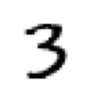

In [13]:
show_image(three_tensors[1])

Compute the average over all the images of the intensity at each pixel

To do this we have to combine or **stack** all the image in the list
and create a *single 3 dimensional* tensor

Common description of a 3 dimensional tensor is a *rank-3 tensor*

This is a pretty common occurance, and pytorch has a function called
*stack* to do this.

Some operations like taking a mean require us to *cast* our integer types to float types.

In pytorch there is a method *.float()* that can be called to do this

Pixel values are expected to be between 0 and 1 so we can divide by 255 to get this value

In [14]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

*** 

#### QUICK EXPERIMENT - Tensor Dimensions
- Start with 2D List converted to tensor

*** 

In [15]:
test_list = [[1, 2, 3, 4],
             [5, 6, 7, 8],
             [9, 8, 7, 6]]
test_tensor = tensor(test_list)
print(test_list)
print(test_tensor)

[[1, 2, 3, 4], [5, 6, 7, 8], [9, 8, 7, 6]]
tensor([[1, 2, 3, 4],
        [5, 6, 7, 8],
        [9, 8, 7, 6]])


create other tensors by multiplying by existing tensors. Multiplying by a number doesn't really work as it changes the dimensions

In [16]:
print(test_tensor)
test_tensor_2 = test_tensor * test_tensor
print(test_tensor_2)
test_tensor_3 = test_tensor * test_tensor_2
print(test_tensor_3)
test_tensor_4 = test_tensor * test_tensor_3
print(test_tensor_4)
test_tensor_5 = test_tensor * test_tensor_4
print(test_tensor_5)


tensor([[1, 2, 3, 4],
        [5, 6, 7, 8],
        [9, 8, 7, 6]])
tensor([[ 1,  4,  9, 16],
        [25, 36, 49, 64],
        [81, 64, 49, 36]])
tensor([[  1,   8,  27,  64],
        [125, 216, 343, 512],
        [729, 512, 343, 216]])
tensor([[   1,   16,   81,  256],
        [ 625, 1296, 2401, 4096],
        [6561, 4096, 2401, 1296]])
tensor([[    1,    32,   243,  1024],
        [ 3125,  7776, 16807, 32768],
        [59049, 32768, 16807,  7776]])


Get the shape of the tensors
- *Update* - Notebooks will only output the latest call on shape

In [17]:
test_tensor.shape
test_tensor_2.shape

torch.Size([3, 4])

Attempt to assing shape to variable so that it can be printed later
- *Update* - This works

In [18]:
shape_1 = test_tensor.shape
print(shape_1)
shape_2 = test_tensor_2.shape
print(shape_2)

torch.Size([3, 4])
torch.Size([3, 4])


Stack the tensors
- *Update* Tensors need to be in a tuple or a list to stack

In [19]:
test_tensor_list = [test_tensor, test_tensor_2, test_tensor_3, test_tensor_4, test_tensor_5]
stacked_test_tensors = torch.stack(test_tensor_list)
print(stacked_test_tensors)

tensor([[[    1,     2,     3,     4],
         [    5,     6,     7,     8],
         [    9,     8,     7,     6]],

        [[    1,     4,     9,    16],
         [   25,    36,    49,    64],
         [   81,    64,    49,    36]],

        [[    1,     8,    27,    64],
         [  125,   216,   343,   512],
         [  729,   512,   343,   216]],

        [[    1,    16,    81,   256],
         [  625,  1296,  2401,  4096],
         [ 6561,  4096,  2401,  1296]],

        [[    1,    32,   243,  1024],
         [ 3125,  7776, 16807, 32768],
         [59049, 32768, 16807,  7776]]])


Get stacked tensor shape
- *Update* - Can be thought of for right now as indexing Z,X,Y

In [20]:
print(stacked_test_tensors.shape)
print(len(stacked_test_tensors.shape))

torch.Size([5, 3, 4])
3


Get all items in stack at row 0, axis 1


In [21]:
row_index = 0
axis_index = 1
selected_row = stacked_test_tensors[:,row_index,axis_index]
print(selected_row)

tensor([ 2,  4,  8, 16, 32])


*** 

#### RESUME

*** 

*shape* is the most important attribute of a tensor. It tells you
the length of each axis. The above is saying there are 6131 images, each of size 28x28 pixels

nothing about the tensor specificallys says first is images, second is height in pixels, third is height in pixels. This is all up to us and how we construct it

The *length* of the tensor shape is it's *rank*

In [22]:
len(stacked_sevens.shape)

3

**Important Terms to Memorize** <br>
*Rank* - the number of axes or dimensions of a tensor<br>
*Shape* - the size of each axis of a tensor<br>

Dimension is used in a confusing way sometimes
A "3D" physical position can be described with vectors, but to pytorch,
the number of dimensions is == 1.

This is because even though it's 3 items long, it's still only one axis
Ex. "3 Dimensional"
Sometimes dimension is used for *size of axis* [1,2,3]
Sometimes it's used for *rank*  [1,2,3]
                                [1,2,3]
                                [1,2,3]

Describing in terms of **rank, axis, and length** are unambiguous

A tensor's rank can be obtained with `ndim`

In [23]:
stacked_threes.ndim

3

Compute what *ideal* 3 looks like - 
- Calculate the mean of all image tensors
    - Take the mean along dimension 0 of this stacked, rank-3 tensor
    - So for every pixel position, compute the average of that pixel over all images
    - Result is one value for every pixel position, == One Image

![title](../img/tensor_dims.jpeg)

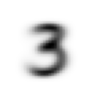

In [24]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

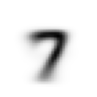

In [25]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

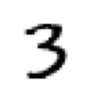

In [26]:
a_3 = stacked_threes[1]
show_image(a_3);

2 Ways<br>
Take the mean of the *absolute value* of differences
- Called the *mean absolute difference* or *L1 norm*<br>
Take the mean of the *square* of differences(which also makes positive)
and then take the square root(to undo squaring)
- Called the *root mean squared error* (RMSE) or *L2 Norm*

Try out both methods:

In [27]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [28]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs, dist_7_sqr

(tensor(0.1586), tensor(0.3021))

*** 

Guessing Sidebar<br>
What do each of the above mean?
We have 2 types of differences, with the differences for both methods showing about a ~50% increase in difference when the example 3 image is measured against the 7 vs. itself.

How are we going to apply these numbers? We have a tensor returned for each of the 4 operations(2 that are "Ideal 3" vs "Test 3", and 2 that are "Ideal 7" vs "Test 3")

There is a difference, but are we just going to iterate over every pixel and test the difference?

If so how do we aggregate results, if at all?

*** 

#### Resume

Both methods show a shorter distance from our example 3 to ideal 3 than example 7 to ideal 3 

So we can infer that our model will give the correct prediction

Pytorch provides both of these as *loss functions*
They're in `torch.nn.functional`, which is recommended to import as "F"

(Same as Pandas - import as "PD")

Fastai already does this so it's available with F as the default name

Worth noting that we have to call the float method on a_3 here, and for `mse_loss` we have to add the square root
as the mean squared error is just that - it's not the "mean squared error squareroot" - so, makes sense

Both of these take an input and a target, with the input being the item to be compared, and the target being the mean
So need to remember that the target is what the input will be running against

In [29]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3.float(),mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

Note: Difference between the L1 norm and MSE is that the MSE will penalize larger mistakes more harshly, as well as being more lenient on small mistakes - I'm going to sidebar to get a visual on this

*** 

#### QUICK EXPERIMENT <br>
My dumbass trying to refamiliarize myself with basic math


Let's run through this real quick my stacked_test_tensors<br>
So here's the state at the beginning

In [30]:
print(stacked_test_tensors)

tensor([[[    1,     2,     3,     4],
         [    5,     6,     7,     8],
         [    9,     8,     7,     6]],

        [[    1,     4,     9,    16],
         [   25,    36,    49,    64],
         [   81,    64,    49,    36]],

        [[    1,     8,    27,    64],
         [  125,   216,   343,   512],
         [  729,   512,   343,   216]],

        [[    1,    16,    81,   256],
         [  625,  1296,  2401,  4096],
         [ 6561,  4096,  2401,  1296]],

        [[    1,    32,   243,  1024],
         [ 3125,  7776, 16807, 32768],
         [59049, 32768, 16807,  7776]]])


Let's create another ndim tensor so that there's something to compare all this against

In [31]:
stacked_test_tensors_2 = stacked_test_tensors * 4
print(stacked_test_tensors_2)

tensor([[[     4,      8,     12,     16],
         [    20,     24,     28,     32],
         [    36,     32,     28,     24]],

        [[     4,     16,     36,     64],
         [   100,    144,    196,    256],
         [   324,    256,    196,    144]],

        [[     4,     32,    108,    256],
         [   500,    864,   1372,   2048],
         [  2916,   2048,   1372,    864]],

        [[     4,     64,    324,   1024],
         [  2500,   5184,   9604,  16384],
         [ 26244,  16384,   9604,   5184]],

        [[     4,    128,    972,   4096],
         [ 12500,  31104,  67228, 131072],
         [236196, 131072,  67228,  31104]]])


**L1** Alright lets see how different this gets - First the absolute value of the difference

In [32]:
stacked_test_diff = stacked_test_tensors_2 - stacked_test_tensors
print(stacked_test_diff.abs())

tensor([[[     3,      6,      9,     12],
         [    15,     18,     21,     24],
         [    27,     24,     21,     18]],

        [[     3,     12,     27,     48],
         [    75,    108,    147,    192],
         [   243,    192,    147,    108]],

        [[     3,     24,     81,    192],
         [   375,    648,   1029,   1536],
         [  2187,   1536,   1029,    648]],

        [[     3,     48,    243,    768],
         [  1875,   3888,   7203,  12288],
         [ 19683,  12288,   7203,   3888]],

        [[     3,     96,    729,   3072],
         [  9375,  23328,  50421,  98304],
         [177147,  98304,  50421,  23328]]])


**MSE** Now the mean square error

In [33]:
stacked_test_squared = ((stacked_test_tensors_2 - stacked_test_tensors)**2).sqrt()
print(torch.round(stacked_test_squared, decimals=1))
print('hello')

tensor([[[3.0000e+00, 6.0000e+00, 9.0000e+00, 1.2000e+01],
         [1.5000e+01, 1.8000e+01, 2.1000e+01, 2.4000e+01],
         [2.7000e+01, 2.4000e+01, 2.1000e+01, 1.8000e+01]],

        [[3.0000e+00, 1.2000e+01, 2.7000e+01, 4.8000e+01],
         [7.5000e+01, 1.0800e+02, 1.4700e+02, 1.9200e+02],
         [2.4300e+02, 1.9200e+02, 1.4700e+02, 1.0800e+02]],

        [[3.0000e+00, 2.4000e+01, 8.1000e+01, 1.9200e+02],
         [3.7500e+02, 6.4800e+02, 1.0290e+03, 1.5360e+03],
         [2.1870e+03, 1.5360e+03, 1.0290e+03, 6.4800e+02]],

        [[3.0000e+00, 4.8000e+01, 2.4300e+02, 7.6800e+02],
         [1.8750e+03, 3.8880e+03, 7.2030e+03, 1.2288e+04],
         [1.9683e+04, 1.2288e+04, 7.2030e+03, 3.8880e+03]],

        [[3.0000e+00, 9.6000e+01, 7.2900e+02, 3.0720e+03],
         [9.3750e+03, 2.3328e+04, 5.0421e+04, 9.8304e+04],
         [1.7715e+05, 9.8304e+04, 5.0421e+04, 2.3328e+04]]])
hello


Alright not quite the output I was looking for, but I got the gist

*** 

#### RESUME

*** 

NumPy and PyTorch are similar in that they can both be much faster than most python because their data structures are written in optimized C. 

PyTorch has to use a single numeric type for all it's components

It's tensors also can't be jagged(innermost arrays being different sizes)

This is because of how the GPU takes matrix operations

PyTorch can also automatically calculate derivatives of operations - which is required for deep learning



#### Tensor Basics

To create an array/tensor, pass a list or list of lists to `array()` or `tensor()`

In [34]:
data = [[2,4,6],[5,6,7]]
arr = array(data)
tns = tensor(data)

In [35]:
#numpy
arr

array([[2, 4, 6],
       [5, 6, 7]])

In [36]:
#pytorch
tns

tensor([[2, 4, 6],
        [5, 6, 7]])

select row

In [37]:
tns[1,:]

tensor([5, 6, 7])

In [38]:
#same
tns[1]

tensor([5, 6, 7])

In [39]:
tns[:,1]

tensor([4, 6])

In [40]:
tns[1,1:3]

tensor([6, 7])

In [41]:
tns+1

tensor([[3, 5, 7],
        [6, 7, 8]])

In [42]:
tns.type()

'torch.LongTensor'

In [43]:
tns*1.5

tensor([[ 3.0000,  6.0000,  9.0000],
        [ 7.5000,  9.0000, 10.5000]])

*** 

## Computing Metrics Using Broadcasting

*** 

In practice use *accuracy* as the metric for classification models

Calculate *accuracy* metric over a *validation set* to prevent overfitting

Not a huge risk here, but going to use a validation set to follow normal practices and to be ready for second try

**Below**<br>
- iterate over and open all images in the validation set directories
- stack tensors
- convert to float between 0 and 1 and reassign
- output shape of resulting tensors

In [44]:
valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255

valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

You should be checking shapes as you go

We want to create a function called `is_3` that will decide if an image is a 3 or a 7.

It will decide which of the two ideal digits the image is closer to

We need to define distance and calculate it

Calc mean abs error below
- define function that takes 2 parameters
- return average of absolute values of parameter difference
- pass `a_3` sample image and `mean3` ideal image to function

In [45]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

Both are single image tensors with a shape of `[28x28]`

To calculate overall accuracy, we need to extrapolate to calculate the distance for *every* image in the validation set

A loop could be used to go through every single-image tensor that are stacked in the validation set `valid_3_tens`, which is 1010 images, but that's not as efficient 

When we take the distance function used for comparing single images but pass it our whole validation(`valid_3_tens`) set tensor stack:

In [46]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1488, 0.1145, 0.1158,  ..., 0.1129, 0.1419, 0.1669]),
 torch.Size([1010]))

Even though the shapes don't match, it returns the distance of every single image as a vector(rank-1 tensor)

How does it do this?
- When pytorch tries to perform a simple subtraction between two tensors of different ranks, it uses **broadcasting**
- That is, it automatically expands the tensor with the smaller rank to have the same size as the one with the larger rank
- This makes tensor code much easier to write

After broadcasting, pytorch applies usual logic to tensors of the same rank

In [47]:
tensor([3,4,7]) + tensor(1)

tensor([4, 5, 8])

In [48]:
tensor([3,4,7]) + tensor([1])

tensor([4, 5, 8])

So pytorch treats `mean3`, a rank-2 tensor of a single image as 1010 copies of itself, then subtracts each from the validation set

*** 


#### QUESTION<br>
What shape would we expect the above `mean3` tensor to have?
- Well, what shape is `mean3`?


In [49]:
mean3.shape

torch.Size([28, 28])

It would have to be the same shape as the target to work. What is the target?

In [50]:
valid_3_tens.shape

torch.Size([1010, 28, 28])

Ok so guessing they're the same at [1010, 28, 28]

Correct!

***

In [51]:
(valid_3_tens-mean3).shape

torch.Size([1010, 28, 28])

Worth noting - 
- Pytorch doesn't actually copy `mean3` 1010 times, it pretends it were a tensor of that shape but doesn't allocate extra memory
- Does the whole calculation in C on the GPU, thousands to millions of times faster than pure python(upper is GPU)


This is true for **ALL BROADCASTING AND ELEMENTWISE OPERATIONS AND FUNCTIONS DONE IN PYTORCH** 
#### IT'S THE MOST IMPORTANT TECHNIQUE FOR YOU TO KNOW TO CREATE EFFICIENT PYTORCH CODE

Our function is applying `abs()` elementwise - that is to each element in the tensor stack

So it returns 1010 matrices of abs values

The `mean((-1,-2))` - -1,-2 represents a range of axes
- -1 being the last element
- -2 refers to the second to last
- So in this case we're getting the last two axes of the tensor


Why?

In [52]:
valid_3_tens.shape

torch.Size([1010, 28, 28])

If we look at the shape above, the last element and second to last elements are the ones we want, the "x & y" of this basically

If we averaged the number of pics - it probably wouldn't work out so well

After taking the mean we're leftover with just [1010] as our final size 

For every image we averaged the intensity of all the pixels in that image

We're going to use our function below to
- pass a variable(x)
- check that the distance between (x and mean3) is less than (x and mean 7)
- so returning a boolean based on whether that condition passes for each x

In [53]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

Testing on example case

In [54]:
print(is_3(a_3))

tensor(True)


Interesting - it returns `True` in a tensor

In [55]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

Ah ok, there we go, True and False as binary 1 and 0    

Now to test it on the validation set

In [56]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

Now calculate the accuracy for each of the 3s and 7s by taking the average of that function for all 3s and inverse it for all 7s

In [57]:
accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = 1-is_3(valid_7_tens).float().mean()

accuracy_3s, accuracy_7s, (accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

Great - above 90% accuracy 

*** 

## Stochastic Gradient Descent (SGD)

We have to make our model learn from it's experience - Represent it the way that Arthur Samuel described it. 

Instead of trying to find a similarity between an image and an "ideal image" we could
- look at each pixel
- come up with a set of weights for each one
- highest weights associated with pixels most likely to be black for a particular category

ex. Low right pixels would be low for a 7, higher for an 8

This can be represented as a function and set of weight values for each possible category 

ex. Probability of being number 8 below:

- create a function that takes 2 parameters, x - image as vector, w - vector
- multiply the image tensor by the vector tensor
- sum of all items in tensors

In [58]:
(test_tensor*test_tensor).sum()

tensor(434)

In [59]:
def pr_eight(x,w): return (x*w).sum()

Need to find a way to auto-update weights and make better until they're as good as we can make them

Want to find specific values for vector `w` that causes the result of our function to be high for numbers that are actual 8s, and low for those not.

Finding best vector `w` is best way to find best function for finding 8s - currently limited by not using a deep neural network - will add later

Steps to take:
1. Initialize the weights
2. For each image, use weights to *predict* if it appears 3 or 7
3. Based on predictions, calculate how good model is (*loss*)
4. Calc. *gradient* - which measures for each weight how changing that weight would change the loss
5. *Step*, aka change, all the weights based on that calculation
6. goto 2
7. Iterate until we decide to stop training - due to model performance or time constraints



These seven steps are key to training all deep learning models

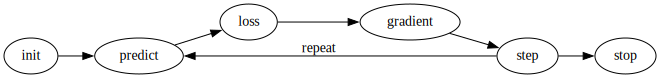

In [60]:
#id gradient_descent
#caption The gradient descent process
#alt Graph showing the steps for Gradient Descent
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

Many ways to do each of the seven steps, many details that make a difference

But some general guidelines:

- Initialize:: Init params to random values
- Loss:: *Testingthe effectiveness of current weight in terms of actual performance* Need a function that will return a number that is small if performance is good
- Step:: a simple way would be to increment manually to find direction then fiddle with step interval - but that's too slow. Need to use calculus to calculate *gradients* for performance optimization
- Stop:: Once epoch number is decided, apply that decision. For digit classifier, we'd keep training until accuracy started getting worse, or we ran out of time

Before applying steps, illustrate what they look like in a simpler case below:

Define simple function - the quadratic - pretend this is our loss function, and x is a weight param of the function

In [61]:
def f(x): return x**2

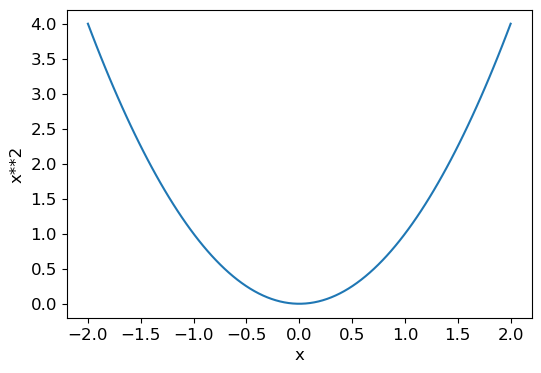

In [62]:
plot_function(f, 'x', 'x**2')

Start by picking random value for param and calc loss value

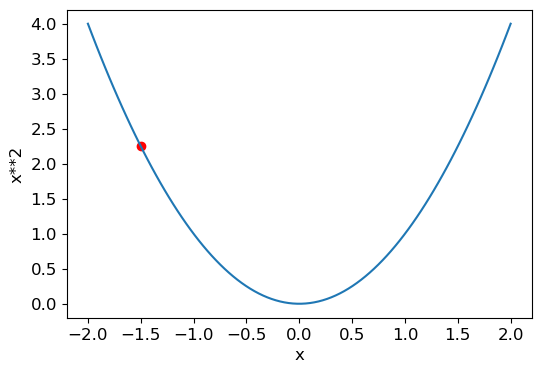

In [63]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color="red")

Then we look and see what happens if we increase or decrease our param by a little - *adjustment*

This is just the slope at a particular point

<img alt="A graph showing the squared function with the slope at one point" width="400" src="images/grad_illustration.svg"/>

We can change our weight just a bit in the direction of the slope, calculate our loss and adjustment again, and repeat this a couple times, eventually leading to our lowest point on the curve 

<img alt="An illustration of gradient descent" width="400" src="images/chapter2_perfect.svg"/>

This is a basic idea that goes back to Newton - we can optimize arbitrary functions in this way. 

Regardless of how complicated functions become, basic *gradient descent* approach won't change much

The only changes we'll see going through the fastai book are some ways to make it faster with better steps

*** 

#### Calculating Gradients

*** 

Calculus will allow us to more rapidly calculate whether the loss is going up or down when we adjust params up or down

aka - gradients will tell us how much we have to change each weight to improve the model

Need some level of intuition about what derivatives are to proceed 

*** 

### Experiment - Calculus brush up

In [64]:
def h(x): return 2**(x+1)

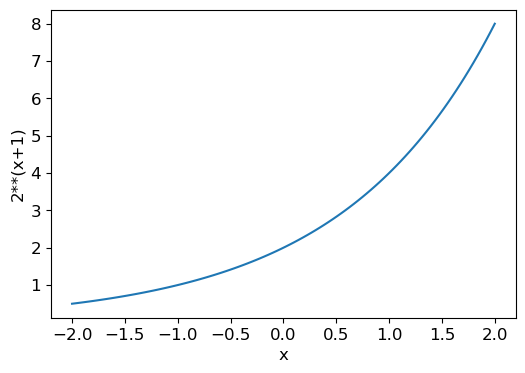

In [65]:
plot_function(h, 'x', '2**(x+1)')

In [66]:
def g(x): return x/(x**2 + 1)

ValueError: only one element tensors can be converted to Python scalars

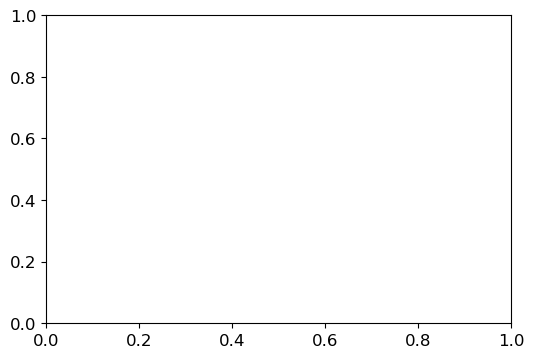

In [85]:
plot_function(g, 'x', 'x/(x**2 + 1')

In [70]:
from math import sqrt
def g(x): return sqrt((x**3 - 4))

In [76]:
calc_g_y_total = g(2) + g(3) + g(4) + g(5)
calc_g_x_total = 2 + 3 + 4 + 5
print(g(2), g(3), g(4), g(5))
print(calc_g_x_total/4)
print(calc_g_y_total/4)
print (calc_g_y_total/calc_g_x_total)

2.0 4.795831523312719 7.745966692414834 11.0
3.5
6.385449553931888
1.8244141582662539


In [86]:
7.75-4.79

2.96

In [87]:
11-7.75

3.25

In [88]:
(2.79+2.96+3.25)/3

3.0

In [91]:
def g(x): return sqrt(15-(2*x))

In [92]:
g(3),g(7)

(3.0, 1.0)